In [1]:
from warnings import filterwarnings
filterwarnings(action='ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px

import scipy.stats as stats
from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures,PowerTransformer,StandardScaler

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector

from sklearn.metrics import classification_report,accuracy_score,precision_score,confusion_matrix
from sklearn.metrics import recall_score,f1_score,balanced_accuracy_score
from sklearn.metrics import precision_recall_curve

from sklearn.model_selection import StratifiedKFold,cross_val_score,train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB,ComplementNB,CategoricalNB

from sklearn.impute import KNNImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,VotingClassifier

from imblearn.over_sampling import SMOTE,SMOTEN,SMOTENC

import re

from sklearn.feature_selection import SelectKBest,VarianceThreshold

from fancyimpute import IterativeImputer,knn,IterativeSVD

In [9]:
link = 'F:\GREAT LAKES\PROJECT\CAPSTONE\SMOTENC_over_sampling_for_ decision tree (Ordinal)\Ordinal_encoded_imbalanced.csv'
link_nc = 'F:\GREAT LAKES\PROJECT\CAPSTONE\SMOTENC_over_sampling_for_ decision tree (Ordinal)\Ordinal_encoded_smotenc.csv'

In [10]:
df = pd.read_csv(link)
df = df.iloc[:,1:]

df_nc = pd.read_csv(link_nc)
df_nc = df_nc.iloc[:,1:]

In [11]:
df.shape

(100985, 39)

In [12]:
Target_imbalanced.shape

(179342,)

In [14]:
def split(predictor,Target,testing_size=0.25,stratify=True):
    if stratify:
        X_train, X_test, y_train, y_test = train_test_split(predictor,Target,test_size=testing_size,stratify=Target,
                                                    random_state=93)
        return X_train, X_test, y_train, y_test
    else:
        X_train, X_test, y_train, y_test = train_test_split(predictor,Target,test_size=testing_size,random_state=93)
        return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = split(df.drop(columns=['readmitted']),df[['readmitted']])

In [28]:
def split_nc(predictor,Target,testing_size=0.25):
        X_train, X_test, y_train, y_test = train_test_split(predictor,Target,test_size=testing_size,
                                                    random_state=93)
        return X_train, X_test, y_train, y_test
Xb_train, Xb_test, yb_train, yb_test = split(df_nc.drop(columns=['readmitted']),df_nc[['readmitted']])

In [27]:
def cv_report_nc(Model,Training_data,Target_imbalanced):
    X_train, X_test, y_train, y_test = train_test_split(Training_data,Target_imbalanced,
                                                        test_size=0.25, random_state=42)
    ba = cross_val_score(Model,X_train,y_train,cv=StratifiedKFold(),
                         scoring='balanced_accuracy').mean()
    pr = cross_val_score(Model,X_train,y_train,cv=StratifiedKFold(),scoring='precision').mean()
    re = cross_val_score(Model,X_train,y_train,cv=StratifiedKFold(),scoring='recall').mean()
    f1 = cross_val_score(Model,X_train,y_train,cv=StratifiedKFold(),scoring='f1').mean()
    print("Metric            :  percentage")
    print("-"*35)
    print(f"Balanced accuracy :  {ba*100:0.2f} %")
    print(f"Precision         :  {pr*100:0.2f} %")
    print(f"recall            :  {re*100:0.2f} %")
    print(f"F1-score          :  {f1*100:0.2f} %")

In [15]:
X_train.shape

(75738, 38)

In [16]:
naive_model = GaussianNB()

In [17]:
naive_model.fit(X_train,y_train)

GaussianNB()

In [26]:
print(classification_report(y_train,naive_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.01      0.01     67253
           1       0.11      1.00      0.20      8485

    accuracy                           0.12     75738
   macro avg       0.52      0.50      0.11     75738
weighted avg       0.83      0.12      0.03     75738



In [25]:
print(classification_report(y_test,naive_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.01      0.01     22418
           1       0.11      1.00      0.20      2829

    accuracy                           0.12     25247
   macro avg       0.51      0.50      0.11     25247
weighted avg       0.83      0.12      0.03     25247



## Fitting model on SMOTENC oversampled data

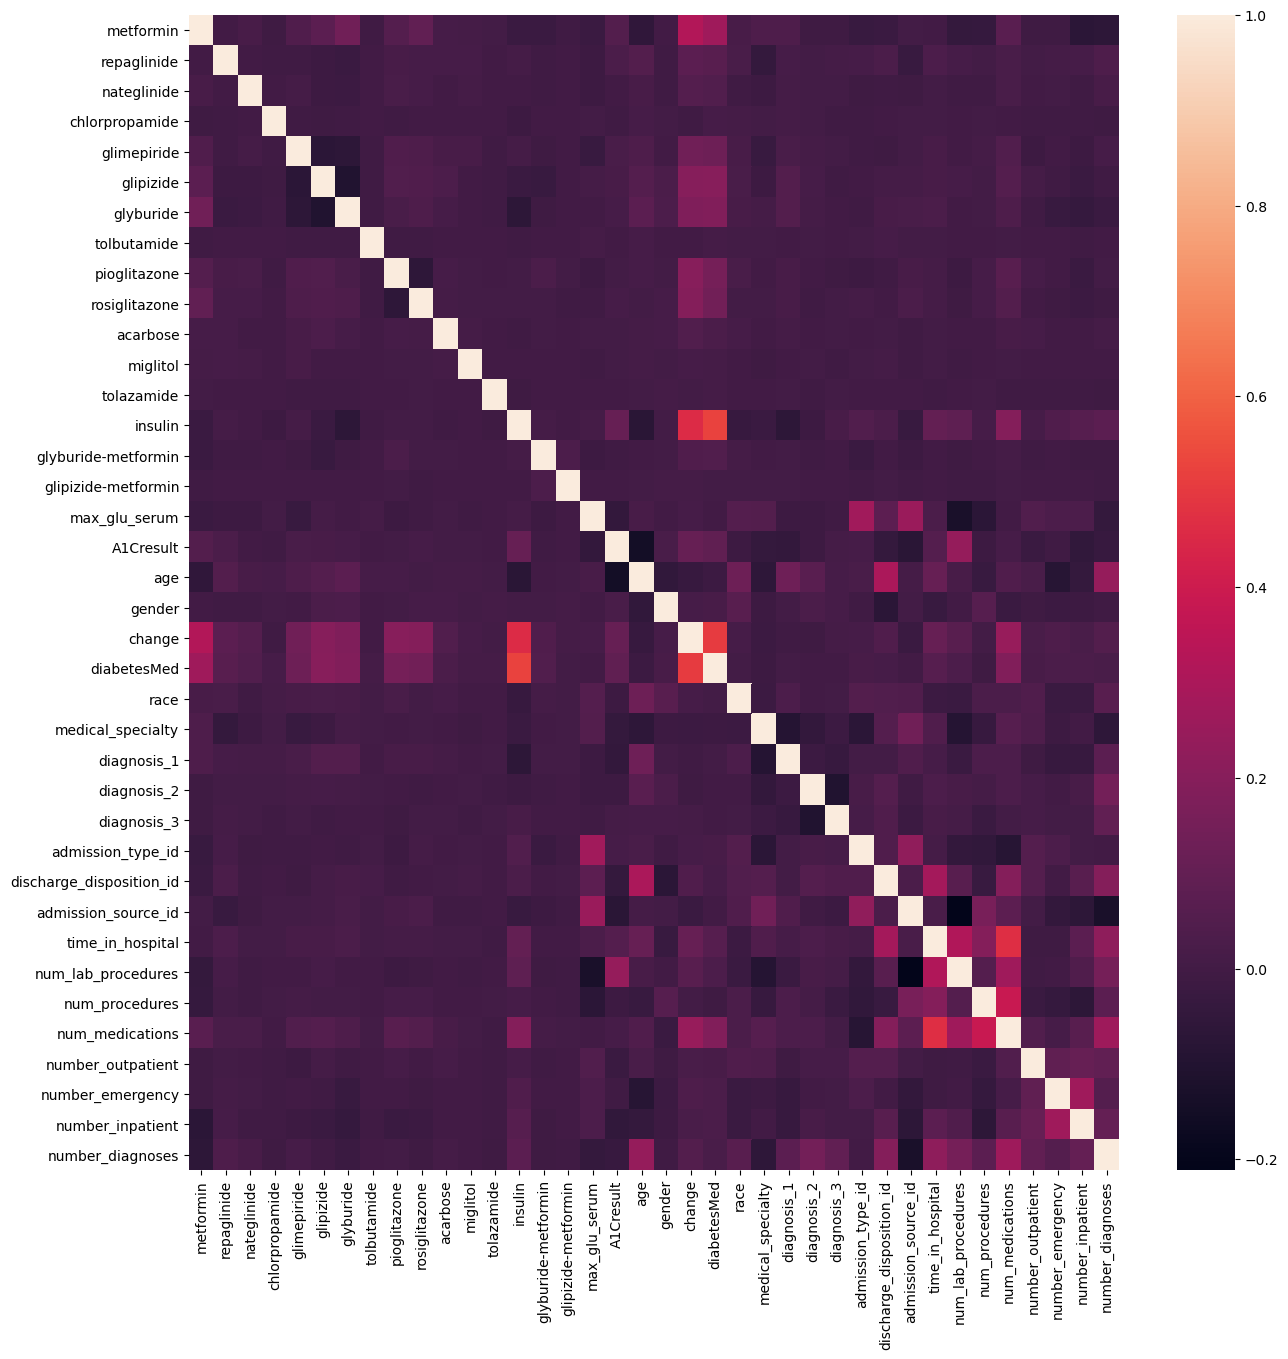

In [37]:
plt.figure(figsize=(15,15))
sns.heatmap(df.drop(columns=['readmitted']).corr())
plt.show()

In [58]:
# There is strong multi-collinearity in two variables 

# time_in_hospital & num_of_medications
# diabetes_med & insulin
# change & insulin

In [59]:
# lets drop 3 variables and let's fit the model

In [39]:
Xb_train, Xb_test, yb_train, yb_test = split(df_nc.drop(columns=['readmitted','diabetesMed','time_in_hospital']),df_nc[['readmitted']])

In [53]:
naive_model_nc = GaussianNB()
naive_model_nc.fit(Xb_train,yb_train)

GaussianNB()

In [42]:
print(classification_report(yb_train,naive_model_nc.predict(Xb_train)))

              precision    recall  f1-score   support

           0       0.86      0.35      0.49     67253
           1       0.59      0.94      0.73     67253

    accuracy                           0.64    134506
   macro avg       0.72      0.64      0.61    134506
weighted avg       0.72      0.64      0.61    134506



In [43]:
print(classification_report(yb_test,naive_model_nc.predict(Xb_test)))

              precision    recall  f1-score   support

           0       0.86      0.35      0.50     22418
           1       0.59      0.94      0.73     22418

    accuracy                           0.65     44836
   macro avg       0.72      0.65      0.61     44836
weighted avg       0.72      0.65      0.61     44836



In [44]:
cv_report_nc(naive_model_nc,Xb_train,yb_train)

Metric            :  percentage
-----------------------------------
Balanced accuracy :  63.67 %
Precision         :  58.49 %
recall            :  94.33 %
F1-score          :  72.18 %


## `Feature Engineering`

In [45]:
# Health_index = 1 / (number_emergency + number_inpatient + number_outpatient)
# severity_of_disease = (time_in_hospital(in days) + num_procedures + num_medications + num_lab_procedures + number_of_diagnoses)

In [46]:
# Based on frequency of patient’s visit to the hospital is high 
# then we can say that patient is less healthier and 
# less healthier patient tends to readmit quickly. 
# Higher the health_index lesser the chance that person will readmit (inversely proportional)

In [48]:
hospital_data = (df_nc['number_outpatient'] + df_nc['number_emergency'] + df_nc['number_inpatient'])
health_index = hospital_data

# for some of the patients there is no visit, hence denominator = 0 let's make health index as 1

In [49]:
# Severity of disease  is the feature created based on time spent in hospital, 
# number of procedures, medications taken by patient. 
# For probabilistic interpretation we divided it by total values.

severity = (df_nc['time_in_hospital'] + df_nc['num_lab_procedures'] + df_nc['num_procedures'] + df_nc['num_medications'] + df_nc['number_diagnoses'])

severity_of_disease = severity

In [50]:
health_index_std = pd.DataFrame(health_index,columns=['Health_index'])
severity_of_disease_std = pd.DataFrame(severity_of_disease,columns=['Severity_of_disease'])

In [51]:
# lets add 'severity index' & 'health_index' to SMOTE resampled data

predictor_nc_f = pd.concat([df_nc.drop(columns=['readmitted']),health_index_std,severity_of_disease_std],axis=1)
Target_nc_f = df_nc[['readmitted']]

In [52]:
Xbf_train, Xbf_test, ybf_train, ybf_test = split_nc(predictor_nc_f,Target_nc_f,testing_size=0.25)

In [54]:
naive_model_ncf = GaussianNB()
naive_model_ncf.fit(Xbf_train,ybf_train)

GaussianNB()

In [55]:
print(classification_report(ybf_train,naive_model_ncf.predict(Xbf_train)))

              precision    recall  f1-score   support

           0       0.86      0.35      0.50     67220
           1       0.59      0.94      0.73     67286

    accuracy                           0.65    134506
   macro avg       0.72      0.65      0.61    134506
weighted avg       0.72      0.65      0.61    134506



In [56]:
print(classification_report(ybf_test,naive_model_ncf.predict(Xbf_test)))

              precision    recall  f1-score   support

           0       0.86      0.35      0.50     22451
           1       0.59      0.94      0.73     22385

    accuracy                           0.65     44836
   macro avg       0.73      0.65      0.61     44836
weighted avg       0.73      0.65      0.61     44836



In [57]:
cv_report_nc(naive_model_ncf,Xbf_train,ybf_train)

Metric            :  percentage
-----------------------------------
Balanced accuracy :  62.60 %
Precision         :  57.61 %
recall            :  95.28 %
F1-score          :  71.79 %
